<a href="https://colab.research.google.com/github/shriyageetika/PHYSICS-DATA/blob/main/PHYSICS_DATA02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#**DATASET**

In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
uploaded = files.upload()

Saving block.csv to block (1).csv


In [4]:
! ls

'block (1).csv'   block.csv   drive   sample_data


In [6]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['block (1).csv']))
print(df.head(n=25))

   Block Name  Point ID  Points_0  Points_1  Points_2  Points_Magnitude  ids  \
0    compacts         0 -0.008637 -0.015841     0.000          0.018042    1   
1    compacts         1 -0.008001 -0.016281     0.000          0.018141    2   
2    compacts         2 -0.007365 -0.015841     0.000          0.017469    3   
3    compacts         3 -0.007874 -0.015400     0.000          0.017296    4   
4    compacts         4 -0.008637 -0.015841     0.032          0.036736    5   
5    compacts         5 -0.008001 -0.016281     0.032          0.036784    6   
6    compacts         6 -0.007365 -0.015841     0.032          0.036458    7   
7    compacts         7 -0.007874 -0.015400     0.032          0.036375    8   
8    compacts         8 -0.006729 -0.015400     0.000          0.016806    9   
9    compacts         9 -0.007111 -0.014960     0.000          0.016563   10   
10   compacts        10 -0.006729 -0.015400     0.032          0.036145   11   
11   compacts        11 -0.007111 -0.014

In [7]:
df

,Block Name,Point ID,Points_0,Points_1,Points_2,Points_Magnitude,ids,nek_bulk_temp,nek_temp,t
0,compacts,0,-0.008637,-0.015841,0.000,0.018042,1,0.0,0.0,621.524
1,compacts,1,-0.008001,-0.016281,0.000,0.018141,2,0.0,0.0,621.341
2,compacts,2,-0.007365,-0.015841,0.000,0.017469,3,0.0,0.0,620.891
3,compacts,3,-0.007874,-0.015400,0.000,0.017296,4,0.0,0.0,621.088
4,compacts,4,-0.008637,-0.015841,0.032,0.036736,5,0.0,0.0,643.106
...,...,...,...,...,...,...,...,...,...,...
72262,compacts_trimmer_tri,5197,0.010672,0.014078,1.600,1.600100,59390,0.0,0.0,716.658
72263,compacts_trimmer_tri,5198,0.010545,0.013418,1.600,1.600090,59389,0.0,0.0,716.150
72264,compacts_trimmer_tri,5199,0.011117,0.013307,1.600,1.600090,59393,0.0,0.0,715.814
72265,compacts_trimmer_tri,5200,0.010926,0.012757,1.600,1.600090,59392,0.0,0.0,715.341


#**WHAT ARE THEY?**

**POINTS MAGNITUE:** The magnitude is essentially the length of the line segment connecting the origin (0, 0) to the point (x, y).

**ids**: An IDS is a security tool that monitors network traffic for malicious activity and alerts administrators if suspicious patterns are detected. It acts like a burglar alarm for your network, notifying you of potential threats.

**nek_bulk_temp**: nek_bulk_temp in the context of Nek5000 likely represents the calculated bulk temperature of the fluid in the simulation. It's a crucial parameter for understanding and analyzing heat transfer and fluid flow characteristics in various applications.

**nek_temp**: In the context of coupled simulations or data exchange between different solvers, nek_temp likely represents a temperature field or variable associated with the Nek5000 solver.

In [8]:
df.head()

,Block Name,Point ID,Points_0,Points_1,Points_2,Points_Magnitude,ids,nek_bulk_temp,nek_temp,t
0,compacts,0,-0.008637,-0.015841,0.000,0.018042,1,0.0,0.0,621.524
1,compacts,1,-0.008001,-0.016281,0.000,0.018141,2,0.0,0.0,621.341
2,compacts,2,-0.007365,-0.015841,0.000,0.017469,3,0.0,0.0,620.891
3,compacts,3,-0.007874,-0.015400,0.000,0.017296,4,0.0,0.0,621.088
4,compacts,4,-0.008637,-0.015841,0.032,0.036736,5,0.0,0.0,643.106


Subsetting Time Using Pandas Dataframes

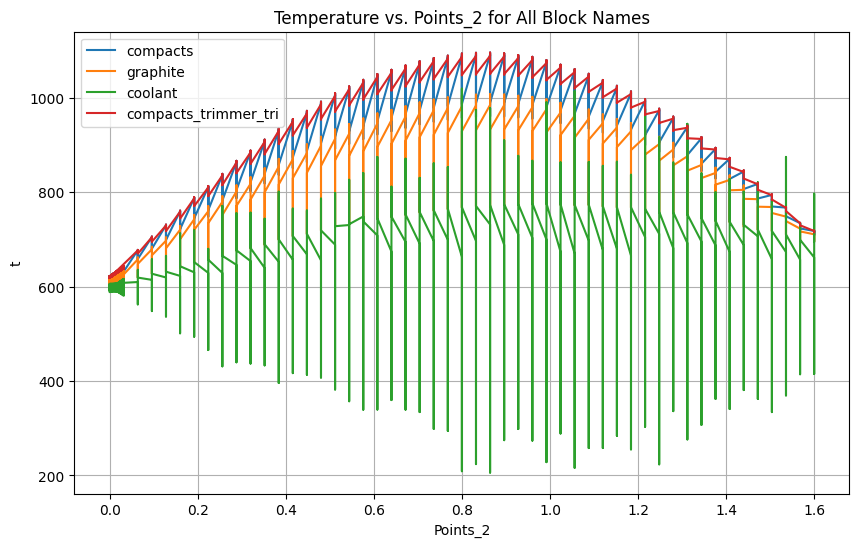

In [14]:
import matplotlib.pyplot as plt

# Get unique block names
block_names = df['Block Name'].unique()

# Create a figure and axes
plt.figure(figsize=(10, 6))

# Iterate through block names and create plots
for block_name in block_names:
    # Filter data for the current block name
    block_data = df[df['Block Name'] == block_name]

    # Create the plot with a label for the legend
    plt.plot(block_data['Points_2'], block_data['t'], label=block_name)

# Add labels, title, and legend
plt.xlabel('Points_2')
plt.ylabel('t')
plt.title('Temperature vs. Points_2 for All Block Names')
plt.legend()  # Show the legend
plt.grid(True)

# Display the plot
plt.show()


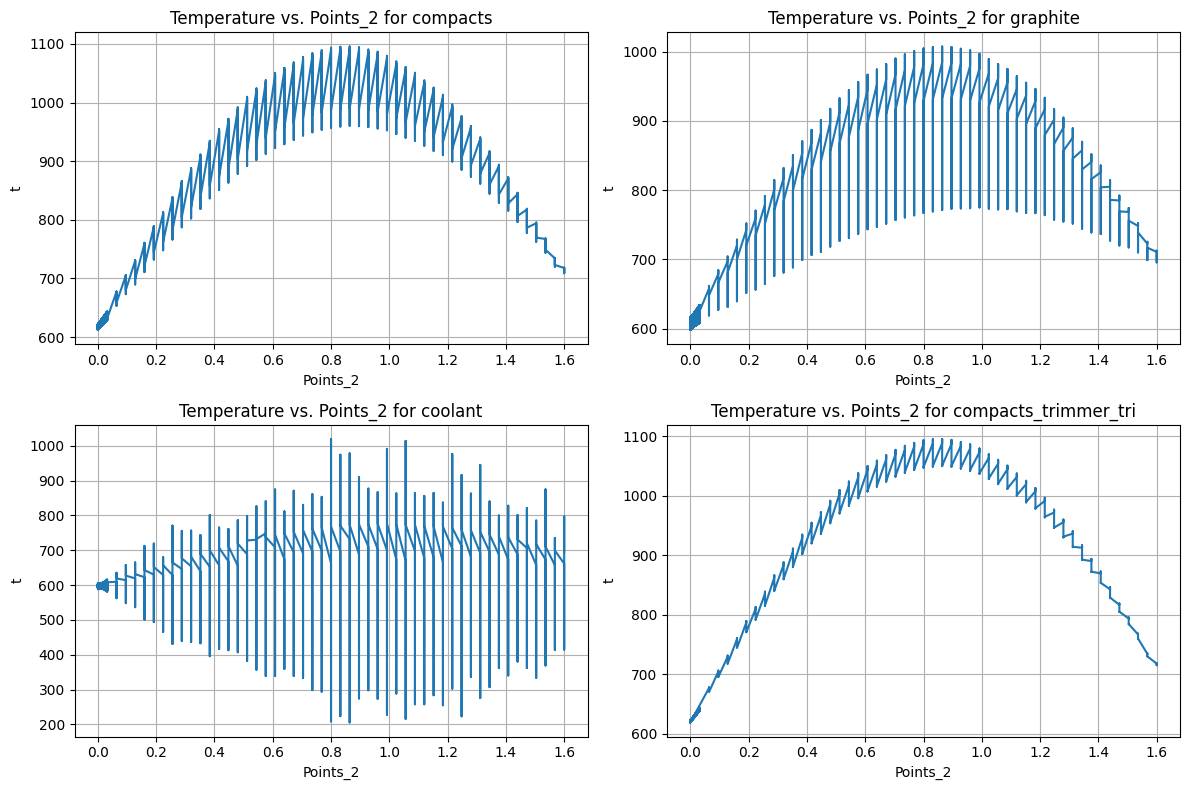

In [13]:
import matplotlib.pyplot as plt

# Get unique block names
block_names = df['Block Name'].unique()

# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Iterate through block names and create plots
for i, block_name in enumerate(block_names):
    row = i // 2  # Calculate row index
    col = i % 2   # Calculate column index
    ax = axes[row, col]  # Get the subplot axes

    # Filter data for the current block name
    block_data = df[df['Block Name'] == block_name]

    # Create the plot
    ax.plot(block_data['Points_2'], block_data['t'])
    ax.set_title(f'Temperature vs. Points_2 for {block_name}')
    ax.set_xlabel('Points_2')
    ax.set_ylabel('t')
    ax.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

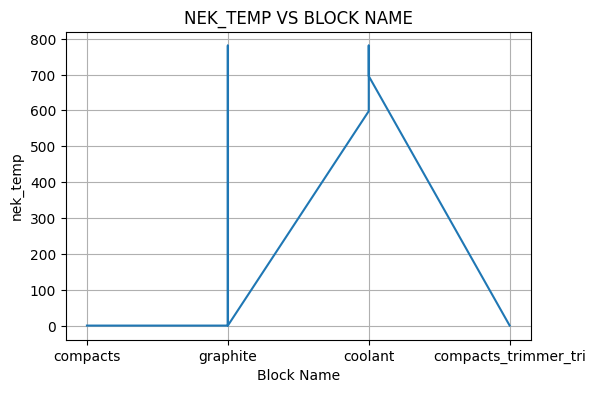

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(df['Block Name'], df['nek_temp'])
plt.title('NEK_TEMP VS BLOCK NAME')
plt.xlabel('Block Name')
plt.ylabel('nek_temp')
plt.grid(True)
plt.show()

The above figure shows the nek_temp in the different Block names, where the nek_temp is 0 for compacts, The temperature spikes dramatically in the graphite region. The coolant shows another sharp temperature rise, reaching its peak and the final block compact_trimmer_tri experiences a rapid temperature decline.

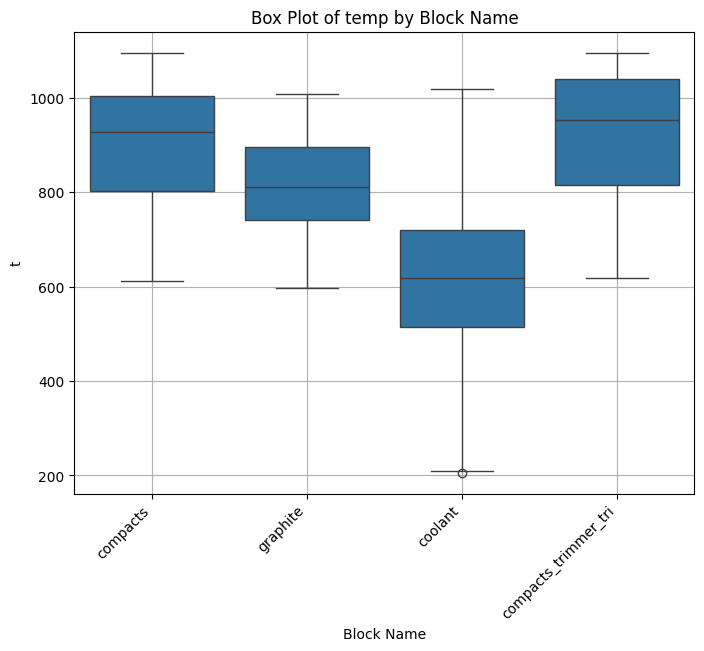

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better box plots

plt.figure(figsize=(8, 6))
sns.boxplot(x='Block Name', y='t', data=df)
plt.title('Box Plot of temp by Block Name')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.grid(True)
plt.show()

THIS GRAPH SAYS:

This box plot represents temperature (t) distributions across different reactor blocks (compacts, graphite, coolant, compacts_trimmer_tri).

 High median temperature (950-1000K) of compact block.

 Moderate median temperature (800K) of graphite block.

 Lowest median temperature (600K) for Coolant block.

 Similar trend to the compacts block, with a slightly
 higher median (1000K) for Compacts_Trimmer_Tri Block.

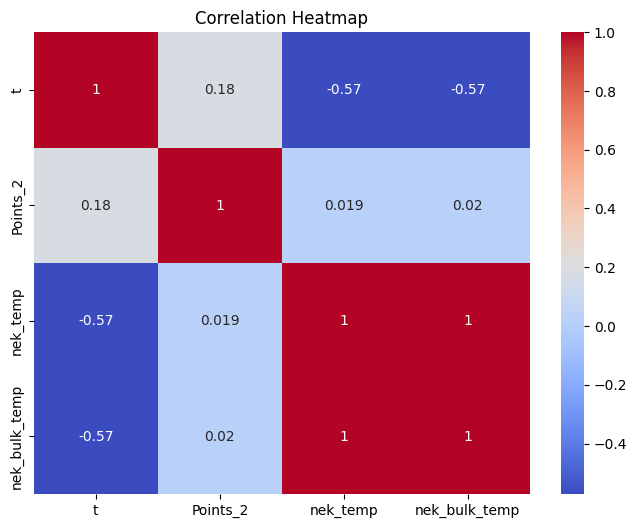

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['t', 'Points_2', 'nek_temp','nek_bulk_temp']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Explanation of the Correlation Heatmap**

*This heatmap represents the correlation between different parameters in the dataset related to uranium fission and reactor simulations. The correlation values range from -1 to 1, where:*

 * 1 *(Red) → Strong positive correlation (both variables increase/decrease together).*

* -1 *(Blue) → Strong negative correlation (one variable increases while the other decreases).*

* 0 *(White) → No correlation (random relationship).*

In [ ]:
#checking for NaN Values
df.isnull().sum()

,0
Block Name,0
Point ID,0
Points_0,0
Points_1,0
Points_2,0
Points_Magnitude,0
ids,0
nek_bulk_temp,0
nek_temp,0
t,0


*There are no NaN Values in the given Data.*